# Data Bootcamp Final Project
### 2019 NYU Stern Spring Semester
## The Changes in the Real Estate Investment in China over the Last 15 Years


#### Principal Investigators: Ruijie (Cherry) Cai (rc3470),  Wei Wang(ww1110) <br> Email: ruijie.cai@stern.nyu.edu, wei.wang@stern.nyu.edu

### Abstract

This project studys how the investment in real estate evolve over time at a narrow geographic level within China. Since the 21st century, China had developed in jet speed. Regardless of the house pricing in the original first-tier cities, e.g. Beijing, Shanghai, Guangzhou, Shenzhen, less-developed cities like Chengdu, Hangzhou, Wuhan, Xi’an actually had the biggest price gain in the House price in recent years. Real estate investment had been pushed to the spotlight, and purchasing house property has been regarded as one of the biggest challenging problems for the younger generations.

The key element analysis of the project is based on the use of [Nation Bureau of Statistic of China](http://www.stats.gov.cn/english/), which had provide access to the measures of the historical index of related index including (i)Yearly Housing Investment; (ii) Yearly Real Estate Development/Investment; (ii) Yealy Housing Price in major cities at detailed geographic levels (e.g. provinces, major cities) and time series for these measures dating back to 1996. Details of this dataset are described below in the data report.

We brook down our project into three sections as following:

- **Step 1**:
Firstly, a general perspective of the <b>nationwide</b> tendency of the real estate industry by using the daily stock price and the trading amount of the stock in the Real Estate Industry in China.

- **Step 2**:
In the year of 2013, China had first put forward of the concept of the "New First-Tier Cities", which includes cities such as, Chengdu, Tianjin, Xi'an, Hangzhou, etc. We want to know how have this new announcement affect the housing market in different provinces. In this step, data cleaning for basic statistics about the real estate investment distribution across <b> provinces </b> is implemented with the contradiction before and after 2013.

- **Step 3**:
Finally, the <b>city</b> level analysis is implemented by using the average housing price in different tier cities from the year of 2003 to the year of 2017. It illustrates the relative changes before and after 2013 to visualize the influence of this emerging tier.
    
- **Step 4**:
Visualizing the three different level's data using the proper grapghic, and continue with our analysis.

Our investigation into the change in the real estate industry is starting from nationwide, continued across provinces and eventually narrow it down to the city level, will be carried along with in-depth analysis. With this examination into the real estate industry in China, we want to show the renovation of investment structure and the direction of the current flow of the habit in investing real estate properties.

### Data Report

**Overview:** The data behind our project comes from the [Nation Bureau of Statistic of China](http://www.stats.gov.cn/english/). As mentioned above, their [historical annual data](http://www.stats.gov.cn/english/Statisticaldata/AnnualData/) provides access to measures of related Housing and Real Estate index at (i) detailed geographic levels (e.g. county's) and (ii) time series for these measures dating back to 1996.

**Important Variables:** The key series that we must retrieve are as follows which are defined as:

- **Investment by Enterprises for Real Estate Development (100 million yuan)**
Investment in Real Estate Development is the investment by real estate companies of all types of ownership in construction including residential buildings, factory buildings, warehouses, hotels, guesthouses, holiday villages, office buildings as well as land development projects such as roads. This, however, excludes the activities in pure land transactions.    

- **Total Investment in Residential Buildings in the Whole Country (100 million yuan)**
This measurement unlike Investment in Real Estate Development which narrows down to the mere investment in residential buildings in that region. Residential real estate involves properties such as undeveloped land, houses, condominiums, and townhouses. 

- **Average Selling Price of Commercialized Buildings (yuan/sq.m)**
This is the annual measurement of the selling price of buildings that are constructed for commercial purposes including office buildings, warehouses, and retail buildings (e.g. convenience stores, 'big box' stores, and shopping malls). 


One way to integrate the three dataset is to group them by date and province/city and with a combination of three columns that state the specific data of the particular index.

**Other Variables**:
Apart from those major data of the real estate investment, in our report, we also downloaded the population of major cities within the selected time slot from the [Nation Bureau of Statistic of China](http://www.stats.gov.cn/english/). Other measures related to real estate development we are using is the daily stock price of the real estate industry in China. We get access to this data by installing a model called [“Tushare”](https://tushare.pro/), which is a Chinese financial data platforms for stocks, funds, futures, bonds, foreign exchange, industry big data, and block-chain data.

- In order to create a general perspective of changes in the real estate industry in China, in our analysis, we first calculate the personal investment in residential buildings per capita in different provinces which adjusts this measure by the population within that geographic area. As for the use of the stock price, we tend to use it as a solid measurement to track the overall performance of the real estate industry over the selected time slot on a national level. 

The *Geography* that we work with is at the province level. We eventually narrow down to focus on specific major cities.

**Access**: We use the[Nation Bureau of Statistic of China](http://www.stats.gov.cn/english/) and [“Tushare”](https://tushare.pro/) to download and access the data. Below We demonstrate that We have the ability to access the data.

In [1]:
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 
import tushare as ts                   # A Chinese financial data platform. Install this model to get access to the stock price

- ## Step 1 (National Level)

In [2]:
#in order to get access to the financial data in Tushare, we need to apply for an account and get this token

ts.set_token("2b8517650616c498e2621ed18ea7217731b6e09879a8fa917156f0b2")

pro = ts.pro_api()

data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date').set_index("list_date")

In [3]:
data.industry.unique() #To get name of the industries of the stock

array(['银行', '全国地产', '生物制药', '环境保护', '区域地产', '酒店餐饮', '运输设备', '综合类',
       '建筑施工', '玻璃', '家用电器', '文教休闲', '装修装饰', '其他商业', '元器件', '电脑设备',
       '其他建材', '汽车服务', '火力发电', '医药商业', '汽车配件', '广告包装', '轻工机械', '新型电力',
       '房产服务', '纺织', '饲料', '电气设备', '石油加工', '铅锌', '农业综合', '批发业', '通信设备',
       '旅游景点', '港口', '机场', '石油贸易', '空运', '医疗保健', '商贸代理', '化学制药', '农药化肥',
       '影视音像', '工程机械', '证券', '化纤', '水泥', '专用机械', '供气供热', '机床制造', '多元金融',
       '百货', '中成药', '路桥', '造纸', '食品', '化工原料', '矿物制品', '水运', '日用化工',
       '机械基件', '汽车整车', '煤炭开采', '软件服务', '铁路', '染料涂料', '白酒', '林业', '水务',
       '水力发电', '互联网', '旅游服务', '铝', '保险', '园区开发', '小金属', '铜', '普钢', '纺织机械',
       '航空', '特种钢', '种植业', '出版业', '焦炭加工', '啤酒', '公路', '超市连锁', '钢加工', '渔业',
       '农用机械', '软饮料', '化工机械', '塑料', '红黄药酒', '橡胶', '家居用品', '摩托车', '电器仪表',
       '服饰', '仓储物流', '电器连锁', '半导体', '电信运营', '黄金', '石油开采', '乳制品', '商品城',
       '公共交通', '船舶', '陶瓷'], dtype=object)

In [4]:
#grab the stock in the national real estate industry("全国地产")
stock = pd.DataFrame(data.loc[data["industry"] == "全国地产"]) 
stock.head()

,ts_code,symbol,name,area,industry
list_date,,,,,
19910129,000002.SZ,000002,万科A,深圳,全国地产
19920602,000014.SZ,000014,沙河股份,深圳,全国地产
19931008,000031.SZ,000031,大悦城,深圳,全国地产
19940617,000036.SZ,000036,华联控股,深圳,全国地产
19940921,000042.SZ,000042,中洲控股,深圳,全国地产


In [5]:
stock.shape
#We got 37 stocks in total in the real estate industry

(37, 5)

In [6]:
#we decided to drop these 10 stocks that issued after the year of 2000
remove_list = ["001979.SZ","002133.SZ","002146.SZ","600048.SH","600240.SH","600383.SH","600393.SH","600510.SH","600515.SH","600565.SH"]


In [7]:
#to remove those stock from the dataframe

stock_df = stock.set_index("ts_code")

for item in remove_list:
    
    stock_df = stock_df.drop(item)

stock_df.head()

,symbol,name,area,industry
ts_code,,,,
000002.SZ,000002,万科A,深圳,全国地产
000014.SZ,000014,沙河股份,深圳,全国地产
000031.SZ,000031,大悦城,深圳,全国地产
000036.SZ,000036,华联控股,深圳,全国地产
000042.SZ,000042,中洲控股,深圳,全国地产


In [8]:
#we got 27 stocks in the dataframe now
stock_df.shape

(27, 4)

In [9]:
#now we need to grab the daily index for these 27 stocks from Jan 1 2000 till Dec 31 2017

stock_list = stock_df.index.tolist()

stock_df = pd.DataFrame([])

for item in stock_list:
    
    stock_data = pro.query('daily', ts_code = item, start_date='20000101', end_date='20171231') 
    
    stock_df = stock_df.append(stock_data)

stock_df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000002.SZ,20171229,30.75,31.71,30.74,31.06,30.70,0.36,1.17,385307.40,1204645.832
1,000002.SZ,20171228,30.40,30.84,29.87,30.70,30.79,-0.09,-0.29,367316.18,1117505.168
2,000002.SZ,20171227,30.55,31.09,30.40,30.79,30.50,0.29,0.95,395488.84,1218292.968
3,000002.SZ,20171226,30.49,30.80,30.12,30.50,30.37,0.13,0.43,278845.61,850307.970
4,000002.SZ,20171225,30.30,31.33,30.27,30.37,29.85,0.52,1.74,506382.57,1561915.069


In [10]:
# Since the dataframe is grouped with nothing on the index we are going to manipulate it in the following
stock_df.shape

(106307, 11)

In [11]:
# we group the dataframe by the trade_date and then aggregate the close price and the daily amount of trading
new_stock_df = stock_df.groupby("trade_date").agg({"close":"mean", "amount":"mean"})

#now we get the average daily stock price and the amount of the trading stock from 2000 to 2017
new_stock_df.head()

,close,amount
trade_date,,
20000104,13.758000,7779.932560
20000105,15.740000,19892.994183
20000106,16.206667,23737.354750
20000107,16.875000,36640.006483
20000110,17.536667,45285.632850


- ## Step 2 (Province Level)

In [12]:
# From Nation Bureau of Statistic of China, we downloaded the data (excel form) for 
#(i)Investment by Enterprises for Real Estate Development (100 million yuan) 
#(ii) Total Investment in Residential Buildings in the Whole Country (100 million yuan) 
#(iii) Average Selling Price of Commercialized Buildings (yuan/sq.m)

url_realEstate = "/Users/cherry/Desktop/final_project_data/real_estate_invest"
url_residential = "/Users/cherry/Desktop/final_project_data/residential_invest"
url_city = "/Users/cherry/Desktop/final_project_data/major_city_price"

In [13]:
# We created the province list to trigger the following "for loop"

province_name = ["beijing", "hebei", "liaoning", "neimenggu", "shanxi_1", "tianjin", "jilin", "anhui", "chongqing", 
                 "fujian","gansu", "guangdong", "guangxi", "guizhou", "hainan", "henan", "heilongjiang", "hubei", 
                 "hunan", "jiangsu","jiangxi", "ningxia", "qinghai", "shandong", "shanxi_2", "shanghai", "sichuan",
                 "tibet", "xinjiang", "yunnan", "zhejiang"] # here we put "shanxi_1" for 山西，and "shanxi_2" for 陕西

In [14]:
# This is the for loop to combine different provinces' Investment by Enterprises for Real Estate Development data 

province_realEstate = pd.DataFrame([]) # First, we created a empty dataframe

for item in province_name:
    
    url = url_realEstate +"/"+ item + ".xls" 
    # Grab the data in excel 
    
    df1 = pd.read_excel(url) 
    # read the data in Panda
    
    df1.drop([0, 1], inplace = True) 
    # Delete the uesless index in the original data we downloaded
    
    df1["province"] = item 
    # Add a column to state the specific province
    
    df1.set_index("province", inplace = True) 
    # Set the added columne for province as the Index
    
    df1.drop(["指标", "1993年"], axis = 1, inplace = True) 
    #Drop the column for 1993 since there is no data for the year 1994
    
    province_realEstate = province_realEstate.append(df1) 
    # Append all the data for each of the province's into one dataframe

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [15]:
province_realEstate.drop(["2018年"], axis = 1, inplace = True) 
#Drop the column for 2018 since there is no data for the year

province_realEstate = province_realEstate.iloc[:, ::-1] 
# Munipulated the timeline

province_realEstate.head()

,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,...,2003年,2002年,2001年,2000年,1999年,1998年,1997年,1996年,1995年,1994年
province,,,,,,,,,,,,,,,,,,,,,
beijing,3692.54,4000.57,4177.05,3715.33,3483.40,3153.44,3036.31,2901.07,2337.71,1908.74,...,1202.48,989.41,783.82,522.07,421.46,377.40,330.34,328.18,352.77,100.0
hebei,4823.91,4695.63,4285.27,4059.72,3445.42,3086.52,3054.59,2264.94,1520.04,1084.44,...,251.27,175.04,140.78,108.39,87.62,61.27,48.75,48.28,43.71,38.0
liaoning,2289.67,2094.85,3558.64,5301.31,6450.75,5455.82,4487.56,3465.76,2640.56,2060.80,...,486.39,388.31,323.09,264.91,182.20,150.38,139.91,135.45,162.72,150.0
neimenggu,889.72,1133.48,1081.05,1370.88,1479.01,1291.44,1591.16,1119.99,815.46,744.30,...,90.79,74.53,65.67,45.22,29.02,22.81,10.78,10.29,8.08,8.0
shanxi_1,1166.28,1597.35,1494.87,1403.55,1308.63,1010.45,790.20,592.24,477.27,326.79,...,95.07,67.43,46.65,39.46,35.05,27.87,18.17,14.79,15.09,12.0


In [16]:
# Since the data for year before 2002 is not applicable for each of the provinces, we decided to drop those before 
# the year of 2002, include the data of 2002

province_realEstate.drop(["2002年","2001年", "2000年", "1999年", "1998年", "1997年", "1996年", "1995年", "1994年"], 
                         axis = 1, inplace = True)

province_realEstate.head()

,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年
province,,,,,,,,,,,,,,,
beijing,3692.54,4000.57,4177.05,3715.33,3483.40,3153.44,3036.31,2901.07,2337.71,1908.74,1995.82,1719.87,1525.01,1473.29,1202.48
hebei,4823.91,4695.63,4285.27,4059.72,3445.42,3086.52,3054.59,2264.94,1520.04,1084.44,709.28,481.58,391.53,315.90,251.27
liaoning,2289.67,2094.85,3558.64,5301.31,6450.75,5455.82,4487.56,3465.76,2640.56,2060.80,1497.58,1142.19,874.25,701.12,486.39
neimenggu,889.72,1133.48,1081.05,1370.88,1479.01,1291.44,1591.16,1119.99,815.46,744.30,500.89,325.02,162.10,111.38,90.79
shanxi_1,1166.28,1597.35,1494.87,1403.55,1308.63,1010.45,790.20,592.24,477.27,326.79,258.93,208.62,177.99,125.79,95.07


In [17]:
# This is the for loop to combine different provinces' Total Investment in Residential Buildings 
#in the Whole Country (100 million yuan)

province_residential = pd.DataFrame([]) 
# First, we created a empty dataframe

for item in province_name:
    
    url = url_residential +"/"+ item + ".xls" 
    # Grab the data in excel
    
    df2 = pd.read_excel(url) 
    # read data in Panda
    
    df2.drop([1, 2], inplace = True) 
    # Delete the uesless index in the original data we downloaded
    
    df2["province"] = item 
    # Add a column to state the specific province
    
    df2.set_index("province", inplace = True) 
    # Set the added columne for province as the Index
    
    df2.drop(["指标", "1993年"], axis = 1, inplace = True) 
    #Drop the column for 1993 since there is no data for the year 1994
    
    province_residential = province_residential.append(df2) 
    # Append all the data for each of the province's into one dataframe

In [18]:
province_residential.drop(["2018年"], axis = 1, inplace = True) 
#Drop the column for 2018 since there is no data for the year

province_residential.head()

,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,...,2003年,2002年,2001年,2000年,1999年,1998年,1997年,1996年,1995年,1994年
province,,,,,,,,,,,,,,,,,,,,,
beijing,1820.32,2124.26,2072.62,2102.65,2026.75,1872.96,1942.64,1662.2,1034.68,1028.22,...,713.62,NaN,528.28,84.23,117.3,106.07,93.27,70.35,NaN,NaN
hebei,4131.87,3964.97,3944.11,3648.80,3231.34,3073.58,3141.50,2614.8,1800.57,1359.68,...,435.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liaoning,1783.40,1625.09,2775.31,4077.20,4875.22,4201.12,3691.60,2724.1,2128.39,1765.18,...,454.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neimenggu,837.11,1132.06,1107.41,1250.50,1289.78,1148.62,1312.82,961.8,732.04,744.47,...,126.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shanxi_1,1143.17,1882.76,2106.76,2004.54,1688.96,1467.05,1187.72,900.3,760.08,564.26,...,122.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Since the data for year before 2002 is not applicable for each of the provinces, we decided to drop those before 
# the year of 2002, include the data of 2002 and get the last 15 years data to do the following analysis

province_residential.drop(["2002年","2001年", "2000年", "1999年", "1998年", "1997年", "1996年", "1995年", "1994年"], 
                          axis = 1, inplace = True)

province_residential.head()

,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年
province,,,,,,,,,,,,,,,
beijing,1820.32,2124.26,2072.62,2102.65,2026.75,1872.96,1942.64,1662.2,1034.68,1028.22,1091.39,951.30,877.90,855.56,713.62
hebei,4131.87,3964.97,3944.11,3648.80,3231.34,3073.58,3141.50,2614.8,1800.57,1359.68,998.98,781.17,607.58,555.28,435.33
liaoning,1783.40,1625.09,2775.31,4077.20,4875.22,4201.12,3691.60,2724.1,2128.39,1765.18,1380.53,1041.86,753.57,594.04,454.88
neimenggu,837.11,1132.06,1107.41,1250.50,1289.78,1148.62,1312.82,961.8,732.04,744.47,523.85,374.13,198.25,154.54,126.10
shanxi_1,1143.17,1882.76,2106.76,2004.54,1688.96,1467.05,1187.72,900.3,760.08,564.26,462.00,350.35,211.65,155.15,122.12


In [20]:
# In order to calculate the residential building per capita in different provinces, we downloaded the data for the 
# provincial population in different provinces over 2003-2017.

province_pop = pd.read_excel("/Users/cherry/Desktop/final_project_data/population.xls")

# We set the index as the name of the province
province_pop.set_index("地区", inplace = True)

In [21]:
province_index_2 = province_residential.index.tolist() 
# create a list of the regions (index) in province_residential

province_column_2 = province_residential.columns.tolist()
# create a list of the years (columns) in province_residential

In [22]:
for item1 in province_index_2:
    
    for item2 in province_column_2:
        
        province_residential.loc[[item1],[item2]] = round(province_residential.loc[[item1],[item2]] / 
                                                          province_pop.loc[[item1],[item2]], 5)

# Divide every entry in province_residential by the corresponding population to get the investment in 
# residential buildings per capita.

province_residential.head()

,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年
province,,,,,,,,,,,,,,,
beijing,0.83847,0.97757,0.95468,0.97707,0.95827,0.90525,0.96218,0.84720,0.55628,0.58059,0.65119,0.59419,0.57081,0.57305,0.49012
hebei,0.54945,0.53079,0.53119,0.49415,0.44066,0.42173,0.43385,0.36347,0.25598,0.19455,0.14388,0.11325,0.08868,0.08155,0.06431
liaoning,0.40819,0.37119,0.63334,0.92854,1.11053,0.95719,0.84225,0.62265,0.49030,0.40908,0.32120,0.24394,0.17853,0.14087,0.10805
neimenggu,0.33100,0.44923,0.44102,0.49920,0.51633,0.46129,0.52894,0.38908,0.29782,0.30461,0.21566,0.15492,0.08250,0.06458,0.05285
shanxi_1,0.30880,0.51134,0.57499,0.54949,0.46528,0.40627,0.33056,0.25190,0.22179,0.16542,0.13616,0.10381,0.06308,0.04652,0.03685


In the year of 2013, China had first put forward of the concept of the "New First-Tier Cities", which includes cities such as, Chengdu, Tianjin, Xi'an, Hangzhou, etc. We want to know how have this new policy affect the housing market.

Since we have got all the basic data that we need, we are going to calculate the mean of the real estate investment and residential building investment of different provinces before and after the year of 2013. We are going to to compare the difference before and after this concept established, and eventually showed in four different heat-like maps of China.

In [23]:
# We create the list to trigger the later function

year_after_2013 = ["2017年", "2016年", "2015年", "2014年", "2013年"]

year_before_2013 = ["2012年", "2011年", "2010年", "2009年", "2008年", "2007年", "2006年", "2005年", "2004年", "2003年"]

In [24]:
province_index_1 = province_realEstate.index.tolist() 
# create a list of the regions (index) in province_realEstate

province_column_1 = province_realEstate.columns.tolist() 
# create a list of the years (columns) in province_realEstate

In [25]:
# We create two new dataframe that indicate the mean of the investment in real estate in particular provience 
#before and after 2013

add_before = pd.DataFrame(round(province_realEstate.loc[province_index_1, year_before_2013]
                                .mean(axis = 1), 5).tolist())
add_after = pd.DataFrame(round(province_realEstate.loc[province_index_1, year_after_2013]
                                .mean(axis = 1), 5).tolist())

In [26]:
realestate_before_2013 = add_before.set_index(province_realEstate.index) 
# We set the name of the provinces as the index for the new dataframe

realestate_before_2013.columns = ["before_2013"] 
# We add the column for the mean before 2013 to the dataframe

realestate_after_2013 = add_after.set_index(province_realEstate.index) 
# We set the name of the provinces as the index for the new dataframe

realestate_after_2013.columns = ["after_2013"] 
# We add the column for the mean after 2013 to the dataframe

realestate_mean = realestate_before_2013.join(realestate_after_2013) 
# We joined the two dataframe into one

realestate_mean.head() 

,before_2013,after_2013
province,,
beijing,2125.374,3813.778
hebei,1316.009,4261.990
liaoning,2281.203,3939.044
neimenggu,675.253,1190.828
shanxi_1,406.335,1394.136


In [27]:
# We create two new dataframe that indicate the mean of the investment in residential buildings in particular 
# provience before and after 2013

add_before_res = pd.DataFrame(round(province_residential.loc[province_index_2, 
                                                             year_before_2013].mean(axis = 1), 5).tolist())
add_after_res = pd.DataFrame(round(province_residential.loc[province_index_2, 
                                                             year_after_2013].mean(axis = 1), 5).tolist())

In [28]:
residential_before_2013 = add_before_res.set_index(province_residential.index) 
# We set the name of the provinces as the index for the new dataframe

residential_before_2013.columns = ["before_2013"] 
# We add the column for the mean before 2013 to the dataframe

residential_after_2013 = add_after_res.set_index(province_residential.index) 
# We set the name of the provinces as the index for the new dataframe

residential_after_2013.columns = ["after_2013"] 
# We add the column for the mean after 2013 to the dataframe

residential_mean = residential_before_2013.join(residential_after_2013) 
# We joined the two dataframe into one

residential_mean.head() 

,before_2013,after_2013
province,,
beijing,0.67309,0.94121
hebei,0.21612,0.50925
liaoning,0.43141,0.69036
neimenggu,0.25522,0.44736
shanxi_1,0.17624,0.48198


- ## Step 3 (City Level)

In [29]:
# We created the city list to trigger the following for loop

city_name = ["beijing", "chengdu", "chongqing", "dalian", "fuzhou", "guangzhou", "guiyang", "haerbin", "haikou",
             "hangzhou", "hefei", "huhehaote", "jinan", "kunming", "lanzhou", "nanchang", "nanjing", "nanning",
             "ningbo", "qingdao", "xiamen", "shanghai", "shenzhen", "shenyang", "shijiazhuang", "taiyuan", "tianjin", 
             "wulumuqi", "wuhan", "xian", "xining", "yinchuan", "changchun", "changsha", "zhengzhou"]

In [30]:
# First, we created two empty dataframes

city_price = pd.DataFrame([]) 
df4 = pd.DataFrame([])

for item in city_name:
    
    url = url_city +"/"+ item + ".xls" 
    #Grab the data in excel
    
    df3 = pd.read_excel(url) 
    # read data in Panda
    
    df3.set_index("指标", inplace = True) 
    # Reset the index 
    
    df4 = pd.DataFrame(df3.loc["住宅商品房平均销售价格(元/平方米)"]).transpose() 
    # Grab the data we need from df3, and then transpose the dataframe
    
    df4["city"] = item 
    # Add a column to state the specific city
    
    df4.set_index("city", inplace = True) 
    # Set the added columne for cities as the Index
    
    df4.drop(["1993年"], axis = 1, inplace = True) 
    # Drop the column for 1993 since there is no data for the year 1994
    
    city_price = city_price.append(df4) 
    # Append all the data for each of the province's into one dataframe

In [31]:
city_price.drop(["2018年"], axis = 1, inplace = True) 
#Drop the column for 2018 since there is no data for the year

city_price.head()

,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,...,2003年,2002年,2001年,2000年,1999年,1998年,1997年,1996年,1995年,1994年
city,,,,,,,,,,,,,,,,,,,,,
beijing,34117.0,28489.0,22300.0,18499.0,17854.0,16553.48,15517.90,17151.0,13224.0,11648.0,...,4456.0,4467.0,4716.0,4557.0,4787.0,NaN,NaN,NaN,NaN,NaN
chengdu,8595.0,7377.0,6584.0,6536.0,6708.0,6678.46,6360.89,5827.0,4864.0,4778.0,...,1908.0,1775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chongqing,6605.0,5162.0,5012.0,5094.0,5239.0,4804.80,4492.30,4040.0,3266.0,2640.0,...,1324.0,1277.0,1133.0,1077.0,1080.0,NaN,NaN,NaN,NaN,NaN
dalian,10019.0,9119.0,8711.0,8921.0,7859.0,7583.97,7928.98,6759.0,6175.0,5617.0,...,2699.0,2668.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuzhou,10547.0,11058.0,11333.0,10105.0,10155.0,10644.52,9553.18,7877.0,6441.0,5244.0,...,2178.0,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Since the data for year before 2002 is not applicable for each of the provinces, we decided to drop those before 
# the year of 2002, include the data of 2002

city_price.drop(["2002年", "2001年", "2000年", "1999年", "1998年", "1997年", "1996年", "1995年", "1994年"], axis = 1, 
                inplace = True)

city_price.head()

,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年
city,,,,,,,,,,,,,,,
beijing,34117.0,28489.0,22300.0,18499.0,17854.0,16553.48,15517.90,17151.0,13224.0,11648.0,10661.24,7375.41,6162.13,4747.14,4456.0
chengdu,8595.0,7377.0,6584.0,6536.0,6708.0,6678.46,6360.89,5827.0,4864.0,4778.0,4198.28,3498.95,2870.44,2223.96,1908.0
chongqing,6605.0,5162.0,5012.0,5094.0,5239.0,4804.80,4492.30,4040.0,3266.0,2640.0,2588.22,2081.31,1900.66,1572.56,1324.0
dalian,10019.0,9119.0,8711.0,8921.0,7859.0,7583.97,7928.98,6759.0,6175.0,5617.0,5417.28,4256.42,3579.86,2972.74,2699.0
fuzhou,10547.0,11058.0,11333.0,10105.0,10155.0,10644.52,9553.18,7877.0,6441.0,5244.0,4899.65,3976.27,2981.13,2463.46,2178.0


In the following, we want to calculate the average housing price in different tier cities.

Based on the [Chinese city tier system](https://en.wikipedia.org/wiki/Chinese_city_tier_system), we had categorized the cities above into three different categories.

In [33]:
city_growth = city_price
#Since we don't want to overwrite the original dataframe we named it as another dataframe

# We create three lists for the different tiers cities

ori_first_tier = ["beijing", "shanghai","guangzhou", "shenzhen"] 
# The original first tier cities

new_first_tier = ["chengdu", "hangzhou", "chongqing", "wuhan", "xian","tianjin", "nanjing",
                  "zhengzhou", "changsha", "shenyang", "qingdao", "ningbo" ] 
# New first tier cities

other_tier = ["dalian","fuzhou","hefei","haerbin","haikou","wulumuqi","taiyuan","changchun",
              "jinan","kunming","lanzhou","huhehaote","nanning","shijiazhuang", "xining", "yinchuan", "nanchang",
              "guiyang","xiamen",]
# The other tier cities

In [34]:
# The original first tier cities' average housing price

city_growth_first = pd.DataFrame()
# We first create an empty dataframe

for i in ori_first_tier:
    
    city_first = pd.DataFrame(city_growth.loc[i]).transpose()
    
    city_growth_first = city_growth_first.append(city_first)

city_growth_first = city_growth_first.transpose()
# To transpose the dataframe so that the index is the year

city_growth_first["Original_first_tier"] = city_growth_first.mean(axis = 1)
# To calculate the average housing price in the listed provinces
    
city_growth_first = pd.DataFrame(city_growth_first["Original_first_tier"])
# Generate the new dataframe

city_growth_first.head()

,Original_first_tier
2017年,31322.50
2016年,29060.75
2015年,22886.25
2014年,18423.25
2013年,17856.75


In [35]:
# New first tier cities' average housing price

city_growth_new = pd.DataFrame()
# We first create an empty dataframe

for i in new_first_tier:
    
    city_new = pd.DataFrame(city_growth.loc[i]).transpose()
    
    city_growth_new = city_growth_new.append(city_new)
    
city_growth_new = city_growth_new.transpose()
# To transpose the dataframe so that the index is the year

city_growth_new["New_first_tier"] = city_growth_new.mean(axis = 1)
# To calculate the average housing price in the listed provinces

city_growth_new = pd.DataFrame(city_growth_new["New_first_tier"])
# Generate the new dataframe
    
city_growth_new.head()

,New_first_tier
2017年,11182.750000
2016年,9794.500000
2015年,8400.166667
2014年,7967.333333
2013年,8131.583333


In [36]:
# The other tier cities' average housing price

city_growth_other = pd.DataFrame()
# We first create an empty dataframe

for i in other_tier:
    
    city_other = pd.DataFrame(city_growth.loc[i]).transpose()
    
    city_growth_other = city_growth_other.append(city_other)

city_growth_other = city_growth_other.transpose()
# To transpose the dataframe so that the index is the year

city_growth_other["Second_tier"] = city_growth_other.mean(axis = 1)
# To calculate the average housing price in the listed provinces
    
city_growth_other = pd.DataFrame(city_growth_other["Second_tier"])
# Generate the new dataframe

city_growth_other.head()

,Second_tier
2017年,9212.000000
2016年,8022.631579
2015年,7413.263158
2014年,6929.210526
2013年,6528.315789


In [37]:
# Here we joined the three separate dataframe into one

growth = city_growth_first.join(city_growth_new)

growth_all = growth.join(city_growth_other)

index_name = ["2017", "2016", "2015", "2014", "2013", "2012", "2011", 
              "2010", "2009", "2008", "2007", "2006", "2005", "2004", "2003"]

growth_all.index = index_name
# We changed the index's name into numercial number

growth_all = growth_all.iloc[::-1,:]
# We regenerate the index based on the time from past to present

growth_all.head()

,Original_first_tier,New_first_tier,Second_tier
2003,4809.2500,2287.166667,2011.789474
2004,5312.3325,2582.440833,2235.836842
2005,6224.4050,3278.855000,2508.806842
2006,7353.6550,3707.230833,2904.628947
2007,10180.7325,4482.765833,3491.817895


In the following, we calculate the average housing price before and after 2013 in the specific cities in each level.

In [38]:
# We create two new dataframe that indicate the mean of the house price in particular cities before and after 2013

add_before_city = pd.DataFrame(round(city_price.loc[city_name, year_before_2013]
                                .mean(axis = 1), 5).tolist())
add_after_city = pd.DataFrame(round(city_price.loc[city_name, year_after_2013]
                                .mean(axis = 1), 5).tolist())

In [39]:
city_before_2013 = add_before_city.set_index(city_price.index) 
# We set the name of the city as the index for the new dataframe

city_before_2013.columns = ["before_2013"] 
# We add the column for the mean before 2013 to the dataframe

city_after_2013 = add_after_city.set_index(city_price.index) 
# We set the name of the city as the index for the new dataframe

city_after_2013.columns = ["after_2013"] 
# We add the column for the mean after 2013 to the dataframe

city_mean = city_before_2013.join(city_after_2013) 
# We joined the two dataframe into one

city_mean.head()

,before_2013,after_2013
city,,
beijing,10749.630,24251.8
chengdu,4320.798,7160.0
chongqing,2870.985,5422.4
dalian,5298.925,8925.8
fuzhou,5625.821,10639.6


In [40]:
# We create a for loop for the original first tier cities

original = pd.DataFrame()

for item in ori_first_tier:
    
    ori_first = pd.DataFrame(city_mean.loc[item]).transpose()
    
    original = original.append(ori_first)

original.head()

,before_2013,after_2013
beijing,10749.630,24251.8
shanghai,9494.492,20976.8
guangzhou,7929.810,15361.4
shenzhen,12759.096,35049.6


In [41]:
# We create a for loop for the new first tier cities
new = pd.DataFrame()

for item in new_first_tier:
    
    new_first = pd.DataFrame(city_mean.loc[item]).transpose()
    
    new = new.append(new_first)
    
new.head()

,before_2013,after_2013
chengdu,4320.798,7160.0
hangzhou,8551.707,16179.6
chongqing,2870.985,5422.4
wuhan,4452.429,8862.6
xian,3720.102,6662.4


In [42]:
# We create a for loop for the other tier cities
other = pd.DataFrame()

for item in other_tier:
    
    other_city = pd.DataFrame(city_mean.loc[item]).transpose()
    
    other = other.append(other_city)
    
other.head()

,before_2013,after_2013
dalian,5298.925,8925.8
fuzhou,5625.821,10639.6
hefei,3737.044,8253.4
haerbin,3541.434,6391.6
haikou,4375.909,8602.6


- ## Step 4 (Data Visualization)

- ### National Level

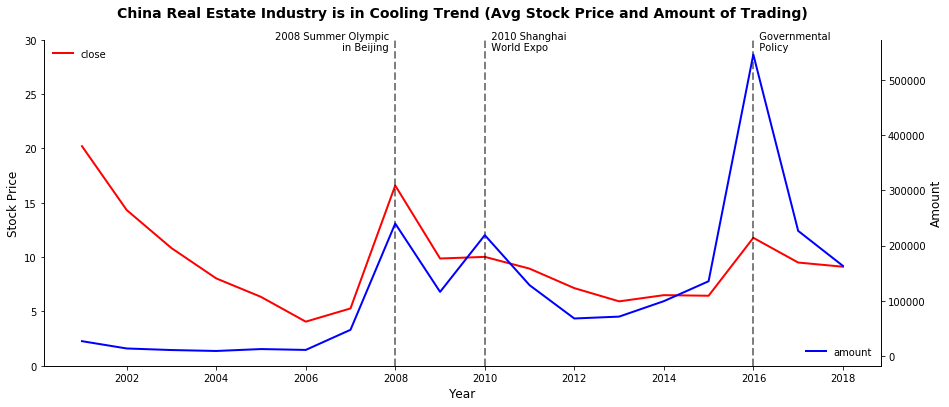

In [43]:
# Convert date strings to date time
new_stock_df.index = pd.to_datetime(new_stock_df.index, yearfirst=True)

fig, ax1 = plt.subplots(figsize = (15,6))

ax1.plot(new_stock_df["close"].resample("y").mean(),color = "red",linewidth = 2)
ax1.set_title("Avg Stock Price of the Real Estate Industry in China", fontsize = 15, fontweight = "bold") 
ax1.set_ylabel("Stock Price", fontsize = 12)
ax1.set_xlabel("Year", fontsize = 12)
ax1.tick_params(axis='y')
ax1.set_ylim(0,30)
ax1.spines["top"].set_visible(False) 
ax1.legend(["close"], loc='upper left', frameon=False)
ax1.set_title("China Real Estate Industry is in Cooling Trend (Avg Stock Price and Amount of Trading)", 
              fontsize = 14, fontweight = "bold").set_position([.5, 1.05])

ax2 = ax1.twinx()
ax2.plot(new_stock_df["amount"].resample("y").mean(),color = "blue",linewidth = 2)
ax2.set_ylabel("Amount", fontsize = 12)
ax2.set_xlabel("Year", fontsize = 12)
ax2.tick_params(axis='y')
ax2.spines["top"].set_visible(False) 
ax2.legend(["amount"],loc='lower right', frameon=False)

ax1.axvline(x= "2008", color='k',alpha=0.5, linestyle='--', linewidth=2) 
ax1.text("2008",29, """2008 Summer Olympic  
in Beijing  """, horizontalalignment='right',fontsize = 10)
ax1.axvline(x= "2010", color='k', alpha=0.5,linestyle='--', linewidth=2) 
ax1.text("2010",29, """  2010 Shanghai 
  World Expo""", horizontalalignment='left',fontsize = 10)
ax1.axvline(x= "2016", color='k', alpha=0.5,linestyle='--', linewidth=2) 
ax1.text("2016",29, """  Governmental 
  Policy""", horizontalalignment='left',fontsize = 10)

plt.show()

# Here we download the graph
fig.savefig('China Real Estate Industry is in Cooling Trend.png')

Based on the plot, it is not hard to see the cooling trend in China property market. As it showed on the plot, the stock price of the real estate industry is gradually falled during the last two decades. After a little hit at around the year of 2008 and 2010 respectively, it eventually experienced a sharp slowdown ever after. Apparently, the tighter government measures in late 2016 have dampened the housing market. 

Nevertheless, in contrast, the amount of transaction is raising and had reached a peak at around the year of 2016. An article by the [REUTERS](https://www.reuters.com/article/us-china-economy-homeprices/china-2016-home-prices-surge-most-in-five-years-but-moderating-easing-bubble-fears-idUSKBN1520GG) had investigate in the 2016's market and gives an in-depth analysis. 

- ### Province Level

In [44]:
import geopandas as gpd # this is the main geopandas 
from shapely.geometry import Point, Polygon # also needed

import matplotlib.pyplot as plt # Helps plot
import numpy as np # Numerical operations
import os

import descartes

In [45]:
china = gpd.read_file("/Users/cherry/Desktop/final_project_data/CHN_adm/CHN_adm1.shx") 
# read the shapefile of China by province

In [46]:
china_index = china.set_index("NL_NAME_1") 
# set the index of china into provinces in Chinses (some of the pinyin of different provinces happen to be th same)

In [47]:
residential_mean.index = ['北京|北京','河北','遼寧|辽宁','內蒙古自治區|内蒙古自治区','山西','天津|天津', '吉林', '安徽|安徽',
                            '重慶|重庆','福建','甘肅|甘肃','廣東|广东', '廣西壯族自治區|广西壮族自治区', '貴州|贵州','海南','河南',
                            '黑龙江省|黑龍江省','湖北','湖南','江蘇|江苏','江西', '寧夏回族自治區|宁夏回族自治区', '青海',
                            '山東|山东', '陝西|陕西', '上海|上海', '四川', '西藏自治區|西藏自治区', '新疆維吾爾自治區|新疆维吾尔自治区',
                            '雲南|云南', '浙江']
# traslate the index of residential_mean into Chinese to easier join it with the map

In [48]:
china_residential = china_index.join(residential_mean) 
# join the two dataframe

china_residential.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,VARNAME_1,geometry,before_2013,after_2013
NL_NAME_1,,,,,,,,,,,
安徽|安徽,49,CHN,China,1,Anhui,Shěng,Province,Ānhuī,"POLYGON ((116.4263229370118 34.63999176025402,...",0.22616,0.61118
北京|北京,49,CHN,China,2,Beijing,Zhíxiáshì,Municipality,Běijīng,"POLYGON ((116.6668853759767 40.97671127319336,...",0.67309,0.94121
重慶|重庆,49,CHN,China,3,Chongqing,Zhíxiáshì,Municipality,Chóngqìng,"POLYGON ((108.5418930053714 32.1896705627442, ...",0.30812,0.86652
福建,49,CHN,China,4,Fujian,Shěng,Province,Fújiàn,(POLYGON ((117.6890258789064 23.53347206115728...,0.26960,0.85484
甘肅|甘肃,49,CHN,China,5,Gansu,Shěng,Province,Gānsù,"POLYGON ((97.18472290039068 42.7716903686524, ...",0.13174,0.30399


In [49]:
realestate_mean.index = ['北京|北京','河北','遼寧|辽宁','內蒙古自治區|内蒙古自治区','山西','天津|天津', '吉林', '安徽|安徽',
                            '重慶|重庆','福建','甘肅|甘肃','廣東|广东', '廣西壯族自治區|广西壮族自治区', '貴州|贵州','海南','河南',
                            '黑龙江省|黑龍江省','湖北','湖南','江蘇|江苏','江西', '寧夏回族自治區|宁夏回族自治区', '青海',
                            '山東|山东', '陝西|陕西', '上海|上海', '四川', '西藏自治區|西藏自治区', '新疆維吾爾自治區|新疆维吾尔自治区',
                            '雲南|云南', '浙江']
# traslate the index of residential_mean into Chinese to easier join it with the map

In [50]:
china_realestate = china_index.join(realestate_mean)
# join the two dataframe

china_realestate.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,VARNAME_1,geometry,before_2013,after_2013
NL_NAME_1,,,,,,,,,,,
安徽|安徽,49,CHN,China,1,Anhui,Shěng,Province,Ānhuī,"POLYGON ((116.4263229370118 34.63999176025402,...",1362.733,4585.216
北京|北京,49,CHN,China,2,Beijing,Zhíxiáshì,Municipality,Běijīng,"POLYGON ((116.6668853759767 40.97671127319336,...",2125.374,3813.778
重慶|重庆,49,CHN,China,3,Chongqing,Zhíxiáshì,Municipality,Chóngqìng,"POLYGON ((108.5418930053714 32.1896705627442, ...",1109.189,3620.064
福建,49,CHN,China,4,Fujian,Shěng,Province,Fújiàn,(POLYGON ((117.6890258789064 23.53347206115728...,1261.486,4424.608
甘肅|甘肃,49,CHN,China,5,Gansu,Shěng,Province,Gānsù,"POLYGON ((97.18472290039068 42.7716903686524, ...",202.562,801.746


Text(0.37, 0.38, '* The darker the color, the more investment it presents')

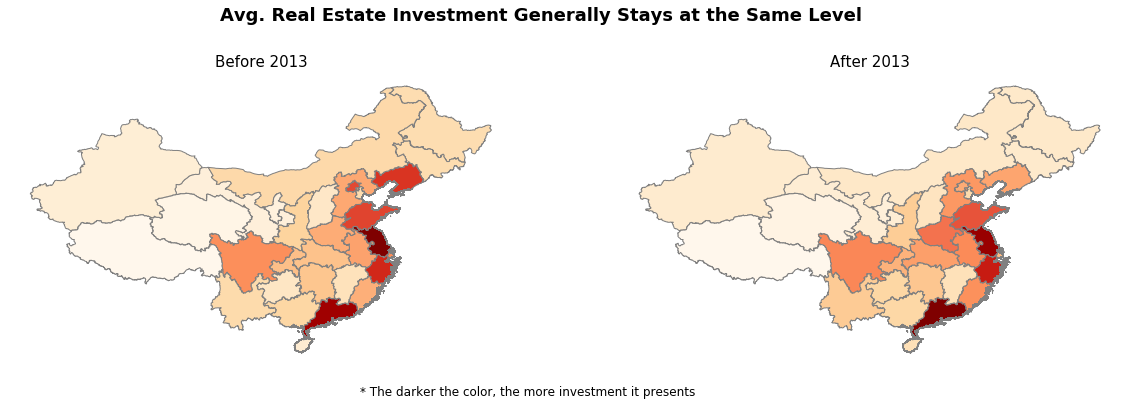

In [51]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
ax1 = china_realestate.plot(ax=ax1, column="before_2013",  edgecolor = "gray", cmap='OrRd')
# draw the real estate investment per capita before 2013
ax2 = china_realestate.plot(ax=ax2, column='after_2013', edgecolor = "gray", cmap='OrRd')
# draw the real estate investment per capita after 2013

ax1.set_title("Before 2013", fontsize = 15) # set subtitle
ax2.set_title("After 2013", fontsize = 15)

ax1.spines["right"].set_visible(False) # remove the unneccessary spines
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

fig.suptitle("Avg. Real Estate Investment Generally Stays at the Same Level  ", x = 0.5, y = 0.65, fontweight = "bold", fontsize = 18)
# set the title for the entire plot

fig.text(0.37, 0.38, "* The darker the color, the more investment it presents", 
         horizontalalignment='left',fontsize = 12)

The map above for the Total Real Estate investment in China above had not shown a considerable change/switch in different provinces in China. So we narrow it down to the investment in the residential buildings per capita to see the changes across provinces before and after 2013.

In [52]:
china_residential["center"] = china_residential["geometry"].centroid
# to get the central point coordinates of each region for annotation

residential_points = china_residential.copy()

residential_points.set_geometry("center", inplace = True)
# set the geometry column to be the point coordinate

residential_points.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,VARNAME_1,geometry,before_2013,after_2013,center
NL_NAME_1,,,,,,,,,,,,
安徽|安徽,49,CHN,China,1,Anhui,Shěng,Province,Ānhuī,"POLYGON ((116.4263229370118 34.63999176025402,...",0.22616,0.61118,POINT (117.2262302583547 31.82578581117809)
北京|北京,49,CHN,China,2,Beijing,Zhíxiáshì,Municipality,Běijīng,"POLYGON ((116.6668853759767 40.97671127319336,...",0.67309,0.94121,POINT (116.4106714990815 40.18491420154791)
重慶|重庆,49,CHN,China,3,Chongqing,Zhíxiáshì,Municipality,Chóngqìng,"POLYGON ((108.5418930053714 32.1896705627442, ...",0.30812,0.86652,POINT (107.8748401405815 30.05864874445629)
福建,49,CHN,China,4,Fujian,Shěng,Province,Fújiàn,(POLYGON ((117.6890258789064 23.53347206115728...,0.26960,0.85484,POINT (117.9909535649906 26.07911430296589)
甘肅|甘肃,49,CHN,China,5,Gansu,Shěng,Province,Gānsù,"POLYGON ((97.18472290039068 42.7716903686524, ...",0.13174,0.30399,POINT (100.9338738920711 37.8207888685579)


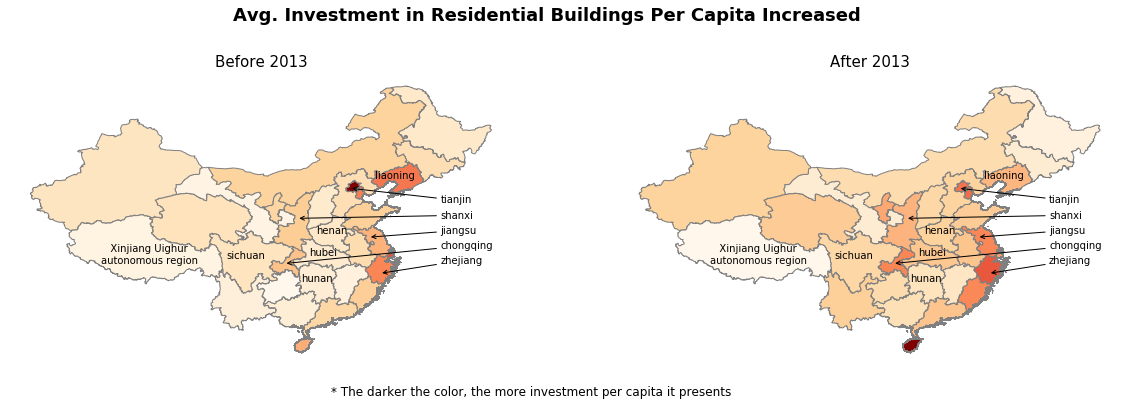

In [53]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
ax1 = china_residential.plot(ax=ax1, column="before_2013",  edgecolor = "grey", cmap='OrRd')
# draw the investment in residential buildings per capita investment before 2013
ax2 = china_residential.plot(ax=ax2, column='after_2013', edgecolor = "grey", cmap='OrRd')
# draw the investment in residential buildings per capita investment after 2013

ax1.set_title("Before 2013", fontsize = 15)# set subtitle
ax2.set_title("After 2013", fontsize = 15)

provinceEn = ["sichuan", "hubei", "henan", "hunan", "liaoning", "shandong"]

provinceCh = ["四川", "湖北", "河南", "湖南", "遼寧|辽宁", "山東|山东"]

i = 0
for i in range(5):
    ax1.text(residential_points.geometry.loc[provinceCh[i]].x + 2, residential_points.geometry.loc[provinceCh[i]].y, 
             provinceEn[i], horizontalalignment='right',fontsize = 10)
    i = i + 1
    
ax1.text(83,30, """   Xinjiang Uighur 
autonomous region""", horizontalalignment='left',fontsize = 10)

ax1.annotate("tianjin", xy=(116, 40), xytext=(128, 38), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

ax1.annotate("shanxi", xy=(109, 36), xytext=(128, 36), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

ax1.annotate("jiangsu", xy=(118.5, 33.5), xytext=(128, 34), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

ax1.annotate("zhejiang", xy=(120, 28.7), xytext=(128, 30), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

ax1.annotate("chongqing", xy=(107.3, 30), xytext=(128, 32), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

i = 0
for i in range(5):
    ax2.text(residential_points.geometry.loc[provinceCh[i]].x + 2, residential_points.geometry.loc[provinceCh[i]].y, 
             provinceEn[i], horizontalalignment='right',fontsize = 10)
    i = i + 1
    
ax2.text(83,30, """   Xinjiang Uighur 
autonomous region""", horizontalalignment='left',fontsize = 10)

ax2.annotate("tianjin", xy=(116, 40), xytext=(128, 38), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

ax2.annotate("shanxi", xy=(109, 36), xytext=(128, 36), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

ax2.annotate("jiangsu", xy=(118.5, 33.5), xytext=(128, 34), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

ax2.annotate("zhejiang", xy=(120, 28.7), xytext=(128, 30), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

ax2.annotate("chongqing", xy=(107.3, 30), xytext=(128, 32), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'})

ax1.spines["right"].set_visible(False) # remove the unneccessary spines
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

fig.suptitle("Avg. Investment in Residential Buildings Per Capita Increased", x = 0.5, y = 0.65,
             fontweight = "bold", fontsize = 18) # set the title for the entire plot

fig.text(0.35, 0.38, "* The darker the color, the more investment per capita it presents", 
         horizontalalignment='left',fontsize = 12)

# Here we download the graph
fig.savefig('Avg. Investment in Residential Buildings Per Capita Increased.png')

From this group of maps, we can infer that the investment in residential buildings in China has generally increased significantly in Southeast China — the coastal areas. Even though there are exceptions that the residential investment in the Northeast Provinces and Xinjiang Uighur autonomous region had decreased, the apparent signal of investing in resindential buildings in Southeast China guided us to think its relationship with the seagoing commerce development. 

Moreover, the emerging tier 1.5 cities announced by the government are mostly located around this area. Therefore, we will conduct futher analysis into city level to study the changing trend in cities, classified by original tier 1, new tier 1 and tier 2.

- ### City Level

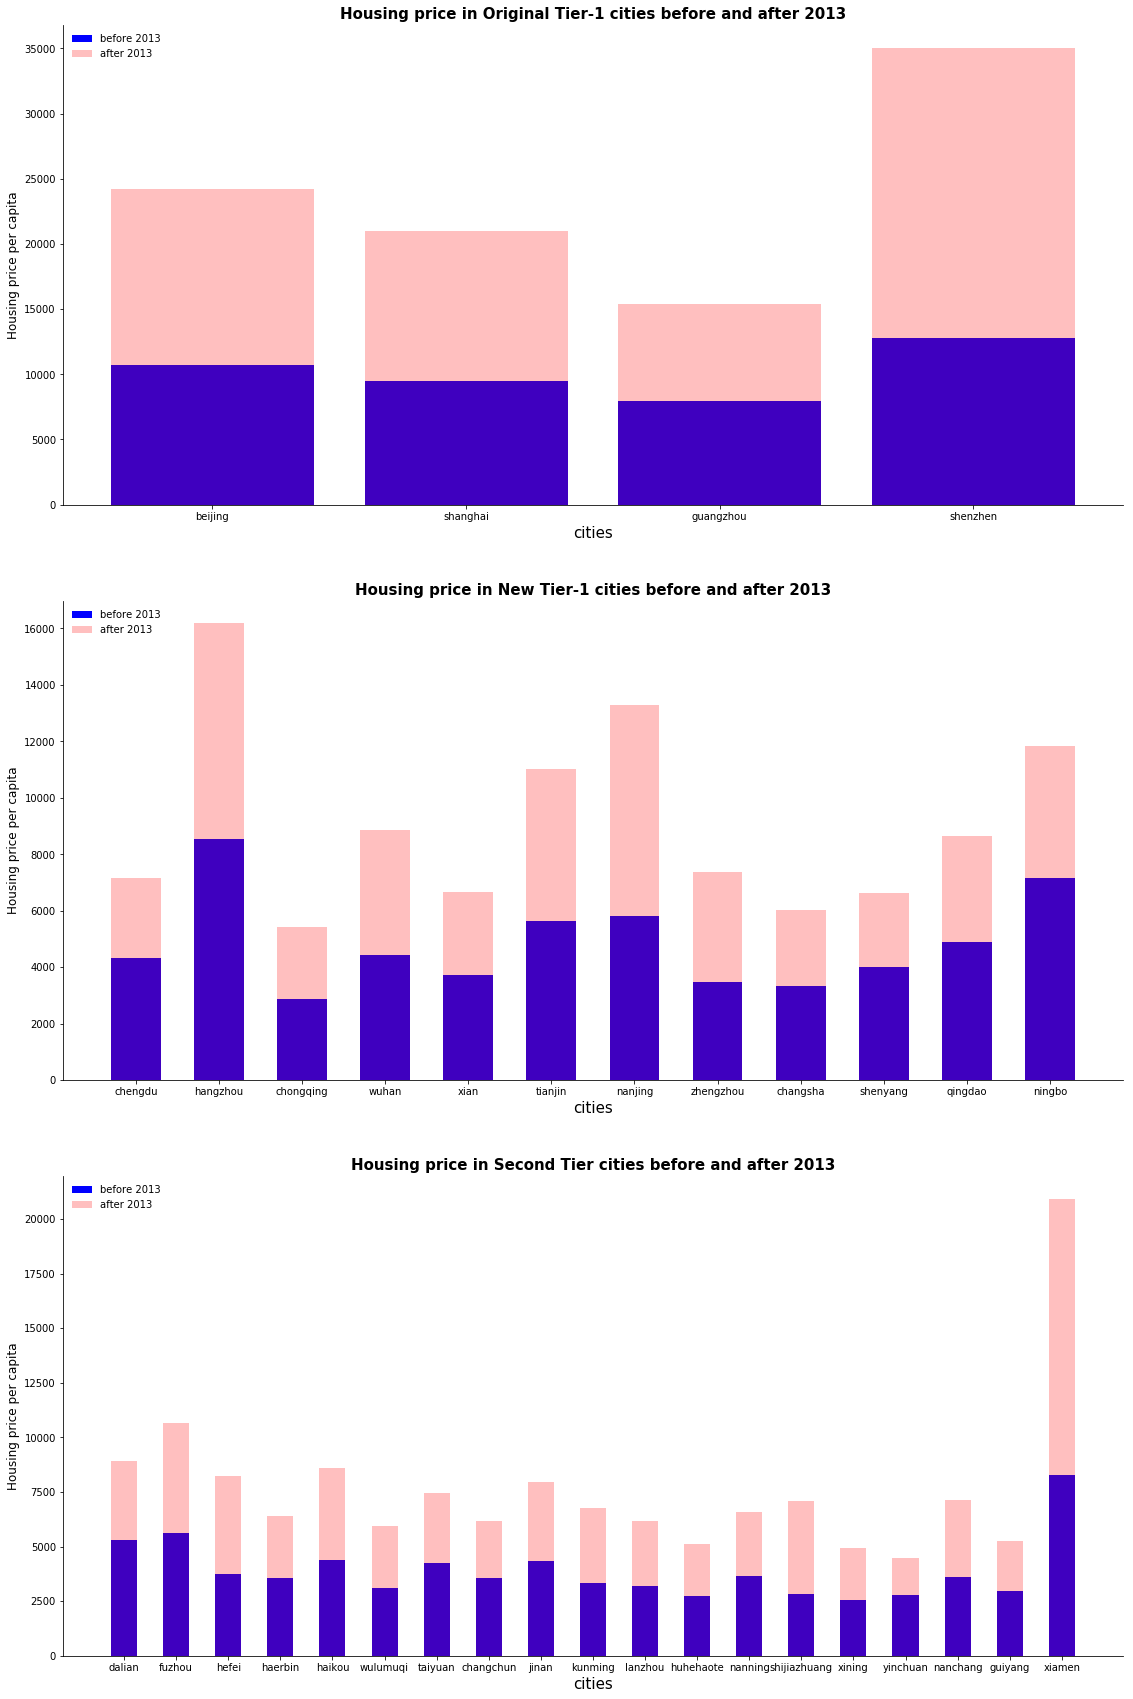

In [54]:
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize = (19,30))

rects1 = ax[0].bar(original.index, original.before_2013, 0.8,color='b',label='before 2013')
rects2 = ax[0].bar(original.index, original.after_2013, 0.8,color='r',label='after 2013',alpha =0.25)

rects1 = ax[1].bar(new.index, new.before_2013, 0.6,color='b',label='before 2013')
rects2 = ax[1].bar(new.index, new.after_2013, 0.6,color='r',label='after 2013',alpha =0.25)

rects1 = ax[2].bar(other.index, other.before_2013, 0.5,color='b',label='before 2013')
rects2 = ax[2].bar(other.index, other.after_2013, 0.5,color='r',label='after 2013',alpha =0.25)

ax[0].set_xlabel("cities",fontsize = 15)
ax[1].set_xlabel("cities",fontsize = 15)
ax[2].set_xlabel("cities",fontsize = 15)

#ax.set_ylabel("Housing price per capit")
ax[0].set_title("Housing price in Original Tier-1 cities before and after 2013",fontsize = 15, fontweight = "bold")
ax[1].set_title("Housing price in New Tier-1 cities before and after 2013",fontsize = 15, fontweight = "bold")
ax[2].set_title("Housing price in Second Tier cities before and after 2013",fontsize = 15, fontweight = "bold")
ax[0].set_ylabel("Housing price per capita",fontsize = 12)
ax[1].set_ylabel("Housing price per capita",fontsize = 12)
ax[2].set_ylabel("Housing price per capita",fontsize = 12)

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)
ax[2].spines["top"].set_visible(False)

ax[0].legend(loc='upper left',frameon=False)
ax[1].legend(loc='upper left',frameon=False)
ax[2].legend(loc='upper left',frameon=False)
plt.show()

After this narrowed down analysis into the city level, the final result from above had showed an overall increasing trends in house price in different cities. However, it is hard to see a general trend so that we implemented another plot in the following.

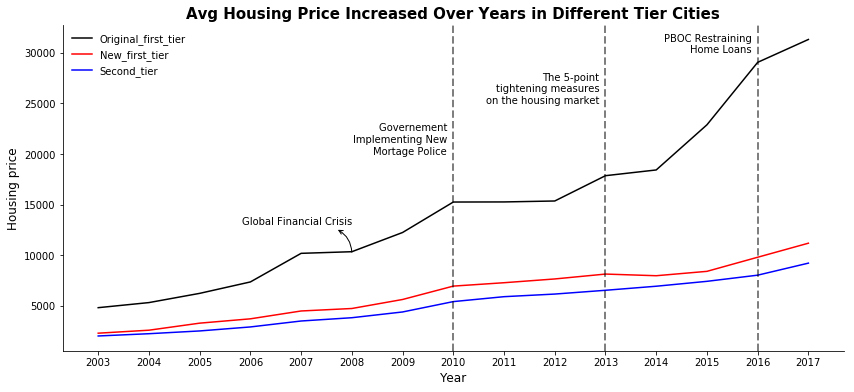

In [55]:
fig, ax = plt.subplots(figsize = (14,6))

ax.plot(growth_all.index, growth_all["Original_first_tier"], color = "k")
ax.plot(growth_all.index, growth_all["New_first_tier"], color = "red")
ax.plot(growth_all.index, growth_all["Second_tier"],color = "blue")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel("Year",fontsize = 12)
ax.set_ylabel("Housing price",fontsize = 12)
ax.set_title("Avg Housing Price Increased Over Years in Different Tier Cities",fontsize = 15, fontweight = "bold")

ax.annotate(
    "Global Financial Crisis",
    xy=("2008", 10100), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=("2008",13000), # This is about where the text is
    horizontalalignment="right", # How the text is alined
    arrowprops={
        "arrowstyle": "<-", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=0,angleB=90",
        "color": "black"
    },
    fontsize=10, color = "black",
    )

ax.axvline(x= "2010", color='k',alpha=0.5, linestyle='--', linewidth=2) 
ax.text("2010",20000, """Governement  
Implementing New  
Mortage Police  """, horizontalalignment='right',fontsize = 10)

ax.axvline(x= "2013", color='k',alpha=0.5, linestyle='--', linewidth=2) 
ax.text("2013",25000, """The 5-point  
tightening measures  
on the housing market  """, horizontalalignment='right',fontsize = 10)

ax.axvline(x= "2016", color='k',alpha=0.5, linestyle='--', linewidth=2) 
ax.text("2016",30000, """PBOC Restraining  
Home Loans  """, horizontalalignment='right',fontsize = 10)

ax.legend(loc='upper left',frameon=False)

plt.show()

# Here we download the graph
fig.savefig('Avg Housing Price In Different Tier Cities.png')

Taken as a whole, the growth of the house price in different tier cities is apparent. It is reasonable where house price in the original first-tier cities is almost doubled compared to the other tiers. As we go through the plot, we can see some interesting points where the speed of the growth is mitigated:

- The first mitigation pointed to the year of 2007 is somehow related to the higher interest rates and bank-required reserve ratios before the global financial crisis.


- The second holding period starts in 2010. Since the house price raised too fast during 2008 and 2009, on April 18, 2010, the Chinese cabinet put forward a new notice in order to regulate the growing house price and cool the property market. The new rules had limited the number of homes a family can buy. The notice stated that commercial banks may suspend the issuance of mortgage to families that have already possessed two houses. According to [China Daily](http://www.chinadaily.com.cn/china/2011-02/16/content_12028324.htm), starting from 2011, Beijing banned the sale of homes to those who have not lived in Beijing for five years while limiting the number of homes a native Beijing family could own to two. And clearly, the policy worked well in the following two years where the price had been held back and stayed at a constant level.


- Another cooling period began in 2013. This related to "The 5-point tightening measures on the housing market" policy which reasserted in March 2013 by the State Council. The police required major cities, publishing annual housing price control target while asking cities with growing housing markets to incline their supply of "commodity" house. Also, the People´s Bank of China (PBOC) branches were asked to increase the requirement in down-payment, and at the same time, the government continued to reform property taxes. In November 2013, Shanghai's municipal government increased the minimum down-payment for second home purchases from 60% to 70% while non-Shanghai residents were faced with tighter qualifications to be allowed in purchasing homes in Shanghai.

    Here is a detailed analysis of the government intervention by [Global Property Guide](https://www.globalpropertyguide.com/Asia/China/Price-History)
    

- From 2016 to 2017, the growth is also cooling. In October 2016, according to the [South China Morning Post](https://www.scmp.com/news/china/policies-politics/article/2026343/central-bank-chief-says-china-will-rein-credit-after) the governor of PBOC, Zhou Xiaochuan, stated that "China will try to control credit growth". Here is another quotation from an economics professor, Li Weisen, who teaches in Fudan University: "China needs to improve control over bank credit, and home mortgage loans are expected to slow from October 2016 on." So in the following year, PBOC had demanded executives of 17 banks in China, restraining home loans, according to [Caixin Online](https://www.caixinglobal.com/2016-10-13/pboc-orders-17-banks-to-curb-housing-loans-100996453.html). As shown in the plot, the growth is slowing.



- ## Summary


Regarding the rising house price in China, an article by [REUTERS](https://www.reuters.com/article/us-china-property-poll/china-house-prices-to-rise-faster-in-2018-in-boost-for-cooling-economy-reuters-poll-idUSKCN1LQ0TA) had pointed out a significant point that the raise in the house price is actually "offering much-needed support to China’s slowing economy as the United States ratchets up tariffs on Chinese goods, though policy makers are likely to remain keenly aware of the risk of property bubbles”. The property investment has been predicted to keep growing as the governmental developers are nowadays looking forward to rebuilding house inventories and constructing more public housing.

Nevertheless, the drawback overweights the benefit in the long-run. For instance, rising house prices will first oppress the lives of residents. When house price increases rapidly and exceeds the affordable range, people will lose their enthusiasm in their work and the savings is tend to decline. In order to live quality life, for example, the young residents need to overdraw the future cash flow which will finally result in a decline in the quality of their life.

Overall, the housing market is in a cooling trend at the national level in China over the last 15 years. The investment of residential buildings in the coastal areas located in Southeast China is growing, while the housing price in different cities inclined constantly regardless of city tier.


A SPECIAL THANKS TO Michael Waugh, Professor of economics at NYU Stern School of Business and the instructor of this course, without whom this whole project would have been IMPOSSIBLE. Our project has indeed much room for improvement, but this is a huge leap from where we were 4 months ago which none of us knew anything about python back then. SEE WHAT WE CAN DO NOW!